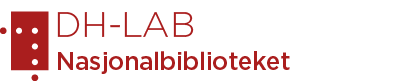

In [34]:
from dhlab.api.dhlab_api import get_document_frequencies
from dhlab import Corpus, Counts, totals
import dhlab.nbtext as nb

# 1. Undersøk korpus med metadata

En viktig metode i undersøkelse av metadata og tekster er grafer og nettverk. 

Metadata er alt som er om teksten, fra forfatter til forlag. Også innholdsord kan sees på som metadata.

## 1.1 Bygg korpus

Korpuset defineres med metadata som dewey, emneord, navn , år, etc. Her kan [Webdewey](http://deweysearchno.pansoft.de/webdeweysearch/index.html) være til god hjelp.

Se eksempelfil om [Korpusbygging](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/1_Bygg_korpus.ipynb) for ulike måter å definere korpus.

In [21]:
bøker = Corpus(
   doctype="digibok",
   freetext="krig OR krigen OR soldater",
   from_year=1950,
   to_year=2010,
   ddk="9%",
   lang='nob',
   limit=300
)

In [22]:
bøker.frame.loc[:, ["title", "authors", "year"]]

,title,authors,year
0,Teater i krig,"Bolling , Jens",1983
1,Spennende år : fra krig til krig med ord og penn,"Zachariassen , Aksel",1978
2,Med livet som innsats : 21 nordmenns dramatisk...,"Christensen , Dag",1995
3,I krig og fred,"Alsvik , Ola / Haug , Jan",2001
4,1940 : fra nøytral til okkupert,"Paulsen , Helge",1969
...,...,...,...
158,Kampen mot mobiliseringstrusselen i Norge 1943-44,"Moland , Arnfinn",1987
159,Kongsvinger festnings historie. [2] : Krigsåre...,"Rastad , Per Erik",1982
160,Stor-Elvdal 9.april 1940-8.mai 1945 : krig og ...,"Hanssen , Hans S.",1974
161,Fars krig,"Westlie , Bjørn",2008


## 1.2. Undersøk forskjeller
### 1.2.1. Undersøk forskjeller internt i korpuset

Her samler vi sammen alle bøkene i korpus og summerer. Men først la oss se på en del av korpuset som en dokument term matrise

In [23]:
# tar de fem første og henter frekvensene for alle bøkene

bøker_dtm = Counts(bøker.head(5))

In [24]:
bøker_dtm 

,100030356,100036056,100511049,100154947,100339542
.,3206.0,7314.0,4928.0,10352.0,4909.0
",",2442.0,7541.0,3383.0,14138.0,4034.0
i,1871.0,3631.0,1638.0,7403.0,2536.0
og,1681.0,3623.0,2047.0,7861.0,3465.0
som,1275.0,2387.0,1240.0,3506.0,1457.0
...,...,...,...,...,...
flyet,0.0,0.0,0.0,0.0,30.0
Molla,0.0,0.0,0.0,0.0,40.0
Anne-Sofie,0.0,0.0,0.0,0.0,44.0
Tirpitz,0.0,0.0,0.0,0.0,53.0


#### 1.2.1.1. Visualiser med varmekart
Et varmekart gjør det enklere å få øye på likhet og variasjon i tallene.

In [30]:
nb.heatmap(bøker_dtm.frame.head(10), color="#045599")

,100030356,100036056,100511049,100154947,100339542
.,3206.000000,7314.000000,4928.000000,10352.000000,4909.000000
",",2442.000000,7541.000000,3383.000000,14138.000000,4034.000000
i,1871.000000,3631.000000,1638.000000,7403.000000,2536.000000
og,1681.000000,3623.000000,2047.000000,7861.000000,3465.000000
som,1275.000000,2387.000000,1240.000000,3506.000000,1457.000000
var,1160.000000,1914.000000,1822.000000,3906.000000,863.000000
til,1019.000000,2517.000000,1071.000000,2701.000000,1379.000000
en,915.000000,1900.000000,1144.000000,2564.000000,1254.000000
å,891.000000,2330.000000,1046.000000,1828.000000,1070.000000
av,837.000000,2303.000000,811.000000,3780.000000,1382.000000


### 1.2.2 Undersøk forskjeller med frekvenser fra bokhylla
Vi teller opp tokens i korpuset med `Counts`. Dette kan ta litt tid.

In [32]:
count_corpus = Counts(bøker)

**Referansekorpus** Kommandoen under lager et referansekorpus av de 150 000 vanligste tokenene i vår samling.

In [35]:
totals = totals(150000)

In [84]:
# Summer tokens fra korpus
bøker_total = count_corpus.frame.sum(1).to_frame("count")

In [85]:
# Frekvensliste for korpus
bøker_total

,count
",",1420381.0
.,1215181.0
^,19253.0
og,441257.0
til,264478.0
...,...
Lovell,21.0
Oldereid,29.0
ZJIZJIN,45.0
BELJAEV,47.0


For å lette arbeidet med å tolke forskjeller normaliserer vi frekvensene til tall mellom 0 og 1.

In [86]:
nb.normalize_corpus_dataframe(totals)
nb.normalize_corpus_dataframe(bøker_total)

True

In [87]:
forskjell = bøker_total.loc[:, "count"] / totals.freq

In [90]:
bøker_typiske_ord = forskjell.sort_values(ascending=False).to_frame("ratio")

In [92]:
bøker_typiske_ord.head(50)

,ratio
løsl,4951.308843
ovf.,4106.210067
f.nr,4063.741798
Møllergata,773.589700
Østf,694.054497
Sachsenhausen,460.799878
Grini,402.611435
Falstad,346.107951
Hedm,319.391295
Telem,309.233529


## Visualiser som ordsky

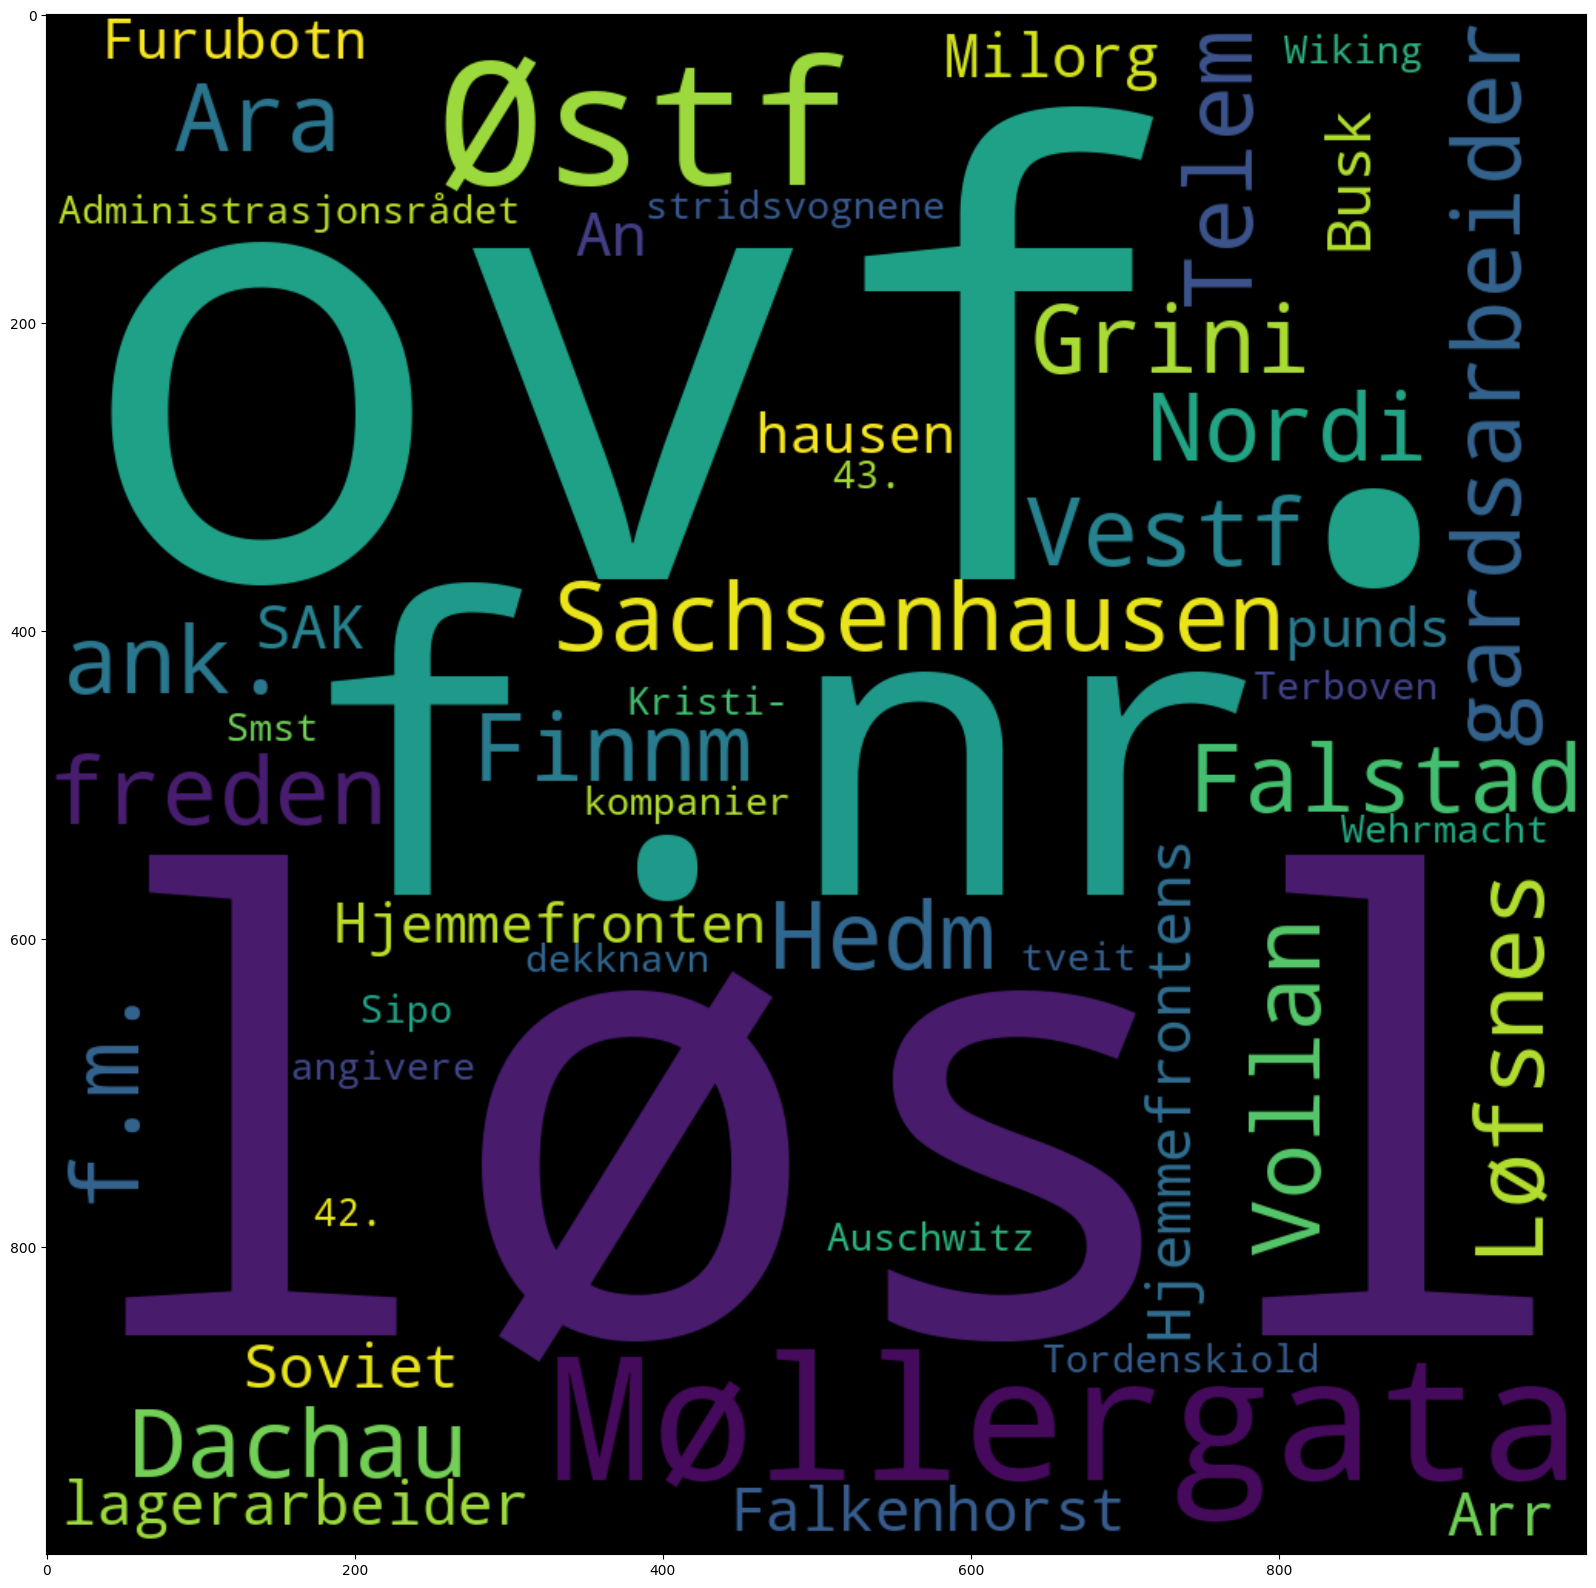

In [83]:
nb.cloud((bøker_typiske_ord/bøker_typiske_ord.sum()).head(50))